In [2]:
# check package versions
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage

print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))
print('OpenCV: {}'.format(cv2.__version__))
print('NumPy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Scikit-Image: {}'.format(skimage.__version__))

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Keras: 2.8.0
OpenCV: 4.5.5
NumPy: 1.22.3
Matplotlib: 3.4.3
Scikit-Image: 0.18.3


In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers import Conv2D
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from skimage.metrics import structural_similarity as ssim
# from skimage.measure import compare_ssim as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os

# python magic function, displays pyplot figures in the notebook
%matplotlib inline

In [4]:
# define a function for peak signal-to-noise ratio (PSNR)
def psnr(target, ref):
         
    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

# define function for mean squared error (MSE)
def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])
    
    return err

# define function that combines all three image quality metrics
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel =True))
    
    return scores


In [5]:
def prepare_images(path, factor):
    
    # loop through the files in the directory
    for file in os.listdir(path):
        
        # open the file
        img = cv2.imread(path + '/' + file)
        
        # find old and new image dimensions
        h, w, _ = img.shape
        new_height = int(h / factor)
        new_width = int(w / factor)
        
        # resize the image - down
        img = cv2.resize(img, (new_width, new_height), interpolation = cv2.INTER_LINEAR)
        
        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        
        # save the image
        print('Saving {}'.format(file))
        cv2.imwrite('images/{}'.format(file), img)

In [14]:
prepare_images('source/', 2)

Saving 000001.jpg
Saving 000002.jpg
Saving 000003.jpg
Saving 000004.jpg
Saving 000005.jpg
Saving 000006.jpg
Saving 000007.jpg
Saving 000008.jpg
Saving 000009.jpg
Saving 000010.jpg
Saving 000011.jpg
Saving 000012.jpg
Saving 000013.jpg
Saving 000014.jpg
Saving 000015.jpg
Saving 000016.jpg
Saving 000017.jpg
Saving 000018.jpg
Saving 000019.jpg
Saving 000020.jpg
Saving 000021.jpg
Saving 000022.jpg
Saving 000023.jpg
Saving 000024.jpg
Saving 000025.jpg
Saving 000026.jpg
Saving 000027.jpg
Saving 000028.jpg
Saving 000029.jpg
Saving 000030.jpg
Saving 000031.jpg
Saving 000032.jpg
Saving 000033.jpg
Saving 000034.jpg
Saving 000035.jpg
Saving 000036.jpg
Saving 000037.jpg
Saving 000038.jpg
Saving 000039.jpg
Saving 000040.jpg
Saving 000041.jpg
Saving 000042.jpg
Saving 000043.jpg
Saving 000044.jpg
Saving 000045.jpg
Saving 000046.jpg
Saving 000047.jpg
Saving 000048.jpg
Saving 000049.jpg
Saving 000050.jpg
Saving 000051.jpg
Saving 000052.jpg
Saving 000053.jpg
Saving 000054.jpg
Saving 000055.jpg
Saving 000

In [15]:
# test the generated images using the image quality metrics

for file in os.listdir('images/'):
    
    # open target and reference images
    target = cv2.imread('images/{}'.format(file))
    ref = cv2.imread('source/{}'.format(file))
    
    # calculate score
    scores = compare_images(target, ref)

    # print all three scores with new line characters (\n) 
    print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))

000001.jpg
PSNR: 23.219726794257095
MSE: 929.4562158540357
SSIM: 0.7797964819466195

000002.jpg
PSNR: 31.253514604488466
MSE: 146.16727656942584
SSIM: 0.9393174517144427

000003.jpg
PSNR: 40.114332885647606
MSE: 19.00064426347799
SSIM: 0.9827435956726962

000004.jpg
PSNR: 22.90448043857382
MSE: 999.4327388928976
SSIM: 0.7268353226516925

000005.jpg
PSNR: 33.61285831320338
MSE: 84.90158231110195
SSIM: 0.9580458505183316

000006.jpg
PSNR: 28.846175377323995
MSE: 254.4392330687558
SSIM: 0.9042702814952968

000007.jpg
PSNR: 27.946952180852477
MSE: 312.97265745799405
SSIM: 0.89938926536032

000008.jpg
PSNR: 27.848136625670975
MSE: 320.1753942892485
SSIM: 0.9157092649493128

000009.jpg
PSNR: 27.811158800100067
MSE: 322.9131532831667
SSIM: 0.8747660671422176

000010.jpg
PSNR: 31.18308331392496
MSE: 148.55705597361097
SSIM: 0.919121963034706

000011.jpg
PSNR: 37.179449913046284
MSE: 37.34707762086383
SSIM: 0.9773961930619182

000012.jpg
PSNR: 33.460967106056884
MSE: 87.92348726935367
SSIM: 0.9

000105.jpg
PSNR: 32.57814148495775
MSE: 107.74260385527265
SSIM: 0.9562472748405516

000106.jpg
PSNR: 33.0884921466853
MSE: 95.79710854551077
SSIM: 0.9383902204636758

000107.jpg
PSNR: 29.609816390103735
MSE: 213.41256056076693
SSIM: 0.9171541459115166

000108.jpg
PSNR: 26.86373868584733
MSE: 401.6314812905886
SSIM: 0.8003262041320806

000109.jpg
PSNR: 29.30337592134389
MSE: 229.0150499948459
SSIM: 0.9108661048684533

000110.jpg
PSNR: 22.920269446033274
MSE: 995.8058447582723
SSIM: 0.7475722231673778

000111.jpg
PSNR: 29.40674680738875
MSE: 223.62838882589423
SSIM: 0.8591620796983822

000112.jpg
PSNR: 31.5460185713594
MSE: 136.64689207298215
SSIM: 0.9184009333362706

000113.jpg
PSNR: 34.41419964966542
MSE: 70.596252963612
SSIM: 0.9558781467828713

000114.jpg
PSNR: 29.012100244736377
MSE: 244.90158231110195
SSIM: 0.9028983509153115

000115.jpg
PSNR: 33.68524254645118
MSE: 83.49824760333986
SSIM: 0.9591652510294816

000116.jpg
PSNR: 31.606844699394653
MSE: 134.74639212452325
SSIM: 0.9340

000218.jpg
PSNR: 32.91232502400504
MSE: 99.76291104009896
SSIM: 0.9496071180054922

000219.jpg
PSNR: 31.79841271766596
MSE: 128.93188846510668
SSIM: 0.8945460737981806

000220.jpg
PSNR: 28.404379239912156
MSE: 281.68498092980104
SSIM: 0.9212609949052736

000221.jpg
PSNR: 31.016801463649244
MSE: 154.35527265230388
SSIM: 0.927272537203239

000222.jpg
PSNR: 27.85475006195725
MSE: 319.688202247191
SSIM: 0.7004487445790674

000223.jpg
PSNR: 31.269377413395564
MSE: 145.63436759097002
SSIM: 0.9414698567963544

000224.jpg
PSNR: 35.08730851536987
MSE: 60.46036491083393
SSIM: 0.9659482569586765

000225.jpg
PSNR: 30.131417768939123
MSE: 189.26043706834346
SSIM: 0.9011014568665319

000226.jpg
PSNR: 28.62072334072827
MSE: 267.9965982888362
SSIM: 0.921942548435651

000227.jpg
PSNR: 31.351811037051064
MSE: 142.8961447273477
SSIM: 0.9449566296079888

000228.jpg
PSNR: 33.76029493951181
MSE: 82.06767343572828
SSIM: 0.9281268333578835

000229.jpg
PSNR: 31.99730085172145
MSE: 123.16052468817648
SSIM: 0.93

000315.jpg
PSNR: 34.154898324912665
MSE: 74.93967116792084
SSIM: 0.9770906494785999

000316.jpg
PSNR: 28.15473037536199
MSE: 298.3517420884445
SSIM: 0.8588830352064504

000317.jpg
PSNR: 30.686961708187617
MSE: 166.53497062158542
SSIM: 0.9398384445283754

000318.jpg
PSNR: 30.24377739313163
MSE: 184.42673435728275
SSIM: 0.8997415423505885

000319.jpg
PSNR: 26.299993422429203
MSE: 457.30112874961344
SSIM: 0.8476483585651051

000320.jpg
PSNR: 30.82695923253055
MSE: 161.2522162663643
SSIM: 0.9251771951094048



In [16]:
# define the SRCNN model
def model():
    
    # define model type
    SRCNN = Sequential()
    
    # add model layers
    SRCNN.add(Conv2D(filters=128, kernel_size = (9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(filters=64, kernel_size = (3, 3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=1, kernel_size = (5, 5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))
    
    # define optimizer
    adam = Adam(lr=0.0003)
    
    # compile model
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNN

In [17]:
# define necessary image processing functions

def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    return img


def shave(image, border):
    img = image[border: -border, border: -border]
    return img

In [18]:
# define main prediction function

def predict(image_path):
    
    # load the srcnn model with weights
    srcnn = model()
    srcnn.load_weights('model/3051crop_weight_200.h5')
    
    # load the degraded and reference images
    path, file = os.path.split(image_path)
    degraded = cv2.imread(image_path)
    ref = cv2.imread('source/{}'.format(file))
    
    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)
    
    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)
    
    # create image slice and normalize  
    Y = numpy.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255
    
    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)
    
    # post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)
    
    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # remove border from reference and degraged image
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)
    
    # image quality calculations
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))
    
    # return images and scores
    return ref, degraded, output, scores

Degraded Image: 
PSNR: 23.116721151622013
MSE: 951.7644966523195
SSIM: 0.7841677417157428

Reconstructed Image: 
PSNR: 24.499692742470472
MSE: 692.2011896221903
SSIM: 0.8509012367446521



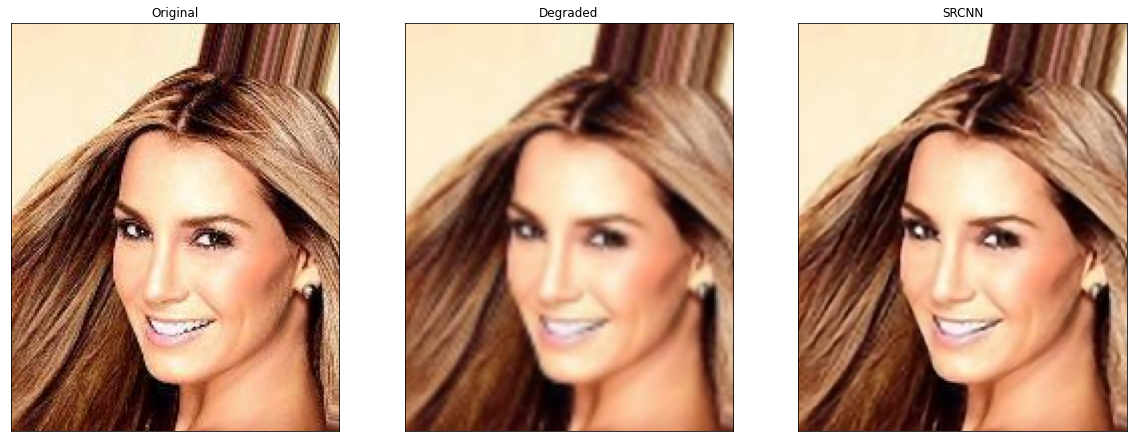

In [19]:
ref, degraded, output, scores = predict('images/000001.jpg')

# print all scores for all images
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))


# display images as subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

# remove the x and y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

In [20]:
for file in os.listdir('images'):
    
    # perform super-resolution
    ref, degraded, output, scores = predict('images/{}'.format(file))
    
    # display images as subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Degraded')
    axs[1].set(xlabel = 'PSNR: {}\nMSE: {} \nSSIM: {}'.format(scores[0][0], scores[0][1], scores[0][2]))
    axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[2].set_title('SRCNN')
    axs[2].set(xlabel = 'PSNR: {} \nMSE: {} \nSSIM: {}'.format(scores[1][0], scores[1][1], scores[1][2]))
    # remove the x and y ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
      
    print('Saving {}'.format(file))
    fig.savefig('output/{}.png'.format(os.path.splitext(file)[0]))
    plt.close()

Saving 000001.jpg
Saving 000002.jpg
Saving 000003.jpg
Saving 000004.jpg
Saving 000005.jpg
Saving 000006.jpg
Saving 000007.jpg
Saving 000008.jpg
Saving 000009.jpg
Saving 000010.jpg
Saving 000011.jpg
Saving 000012.jpg
Saving 000013.jpg
Saving 000014.jpg
Saving 000015.jpg
Saving 000016.jpg
Saving 000017.jpg
Saving 000018.jpg
Saving 000019.jpg
Saving 000020.jpg
Saving 000021.jpg
Saving 000022.jpg
Saving 000023.jpg
Saving 000024.jpg
Saving 000025.jpg
Saving 000026.jpg
Saving 000027.jpg
Saving 000028.jpg
Saving 000029.jpg
Saving 000030.jpg
Saving 000031.jpg
Saving 000032.jpg
Saving 000033.jpg
Saving 000034.jpg
Saving 000035.jpg
Saving 000036.jpg
Saving 000037.jpg
Saving 000038.jpg
Saving 000039.jpg
Saving 000040.jpg
Saving 000041.jpg
Saving 000042.jpg
Saving 000043.jpg
Saving 000044.jpg
Saving 000045.jpg
Saving 000046.jpg
Saving 000047.jpg
Saving 000048.jpg
Saving 000049.jpg
Saving 000050.jpg
Saving 000051.jpg
Saving 000052.jpg
Saving 000053.jpg
Saving 000054.jpg
Saving 000055.jpg
Saving 000

In [22]:
for file in os.listdir('images'):
    
    # perform super-resolution
    ref, degraded, output, scores = predict('images/{}'.format(file))
    print('Saving {}'.format(file))
    cv2.imwrite('out_images/{}.png'.format(os.path.splitext(file)[0]), output)

Saving 000001.jpg
Saving 000002.jpg
Saving 000003.jpg
Saving 000004.jpg
Saving 000005.jpg
Saving 000006.jpg
Saving 000007.jpg
Saving 000008.jpg
Saving 000009.jpg
Saving 000010.jpg
Saving 000011.jpg
Saving 000012.jpg
Saving 000013.jpg
Saving 000014.jpg
Saving 000015.jpg
Saving 000016.jpg
Saving 000017.jpg
Saving 000018.jpg
Saving 000019.jpg
Saving 000020.jpg
Saving 000021.jpg
Saving 000022.jpg
Saving 000023.jpg
Saving 000024.jpg
Saving 000025.jpg
Saving 000026.jpg
Saving 000027.jpg
Saving 000028.jpg
Saving 000029.jpg
Saving 000030.jpg
Saving 000031.jpg
Saving 000032.jpg
Saving 000033.jpg
Saving 000034.jpg
Saving 000035.jpg
Saving 000036.jpg
Saving 000037.jpg
Saving 000038.jpg
Saving 000039.jpg
Saving 000040.jpg
Saving 000041.jpg
Saving 000042.jpg
Saving 000043.jpg
Saving 000044.jpg
Saving 000045.jpg
Saving 000046.jpg
Saving 000047.jpg
Saving 000048.jpg
Saving 000049.jpg
Saving 000050.jpg
Saving 000051.jpg
Saving 000052.jpg
Saving 000053.jpg
Saving 000054.jpg
Saving 000055.jpg
Saving 000

In [24]:
import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob('out_images/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 0.3, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()